# Code implementation for Brute force method, KMP and Boyer Moore

## Input Genomic FASTA File ##

import pandas as pd
data_KMP=[]
data_Brute=[]
data_Boyer=[]

In [2]:
inputFile = 'genomic.fna'

## Input File Formatting (Removing of "\n" and headers) 
#### Reference to (https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string)

In [3]:
tempFile = 'tempGenomic.txt'
removeChar = ['>'] 


with open(inputFile) as oldfile, open(tempFile, 'w') as newfile:
    for line in oldfile:
        if not any(removeChar in line for removeChar in removeChar):
            line = line.replace('\n', '')
            newfile.write(line)

a = open(tempFile, 'r')
a = a.read()

# Input Sequence #

In [530]:
inputSequence = input("Enter sequence: ")

Enter sequence: AAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTT


# Brute Force Method 

In [531]:
i=0
j=0
cnt_Brute=0
occurOnceFlag=0 #To check if there is at least once occurence
while i<len(a):
    # To check for the first character of the input seqence & file
    cnt_Brute+=1
    if a[i]==inputSequence[j]:
        #Increase the index of the sequence to check for the next character
        j=j+1
    else:
        cnt_Brute+=1
        if j>0:
            i=i-j
        #To re-check for the input sequence
        j=0
    cnt_Brute+=1
    if j==len(inputSequence):
        #Bringing the index of input sequence back to 0 to check for other match sequence in the file
        j=0
        print("There is an occurrence at position:", ((i+2)-len(inputSequence)))
        #i is incremented to increase the position of the character in the Genome file
        occurOnceFlag=1
        
    if(i == len(a) - 1 and occurOnceFlag == 0): #When there is COMPLETELY no occurence
        print("There is no occurence for your input: " + inputSequence)
        
    i+=1
data_Brute.append([len(inputSequence),cnt_Brute])

There is an occurrence at position: 26225


# KMP

In [532]:
# For making the prerequisite list needed for KMP
i,j=1,0
l=[]
l.append(0)
cnt_KMP=0
while i<len(inputSequence):
    cnt_KMP+=1
    if inputSequence[i]==inputSequence[j]:
        l.append(1+j)
        i+=1
        j+=1
    else:
        cnt_KMP+=1
        if j!=0:
            j=l[j-1]
        else:
            l.append(0)
            i+=1
# Re-initailising i and j
i = 0
j = 0
occurOnceFlag=0 #To check if there is at least once occurence

# Main KMP algorithm

while (i < len(a)):
    cnt_KMP+=1
    if a[i] == inputSequence[j]:
        i += 1
        j += 1
        cnt_KMP+=1
        if j == len(inputSequence):
            print("There is an occurrence at position:", (i - j + 1))
            i = i + len(inputSequence) - 1
            occurOnceFlag=1
            j = l[j - 1]
    elif i < len(a) and inputSequence[j] != a[i]:
        cnt_KMP+=1
        if j != 0:
            j = l[j - 1]
        else:
            i += 1
#When there is COMPLETELY no occurence
if(i == len(a) and occurOnceFlag == 0): 
    print("There is no occurence for your input: " + inputSequence)
data_KMP.append([len(inputSequence),cnt_KMP])

There is an occurrence at position: 26225


# Boyer Moore

In [533]:
# To calculate the maximum number of repetitions in inputSequence
maximum=1
cnt_Boyer=0
for k in range(0,len(inputSequence)):
    cnt=1
    while(k+1<len(inputSequence) and inputSequence[k]==inputSequence[k+1]):
        cnt+=1
        k+=1
        cnt_Boyer+=1
    if cnt>maximum:
        maximum=cnt
    
Count_A1=0
Count_A2=0
Count_G1=0
Count_G2=0
Count_T1=0
Count_T2=0
Count_C1=0
Count_C2=0
star=len(inputSequence)
l=[]

#Making the prerequisite table for Boyer Moore

for i in range(0,len(inputSequence)):
    cnt_Boyer+=1
    off=len(inputSequence)-i-maximum
    if inputSequence[i]=='A':
        Count_A1=max(1,off)
        Count_A2+=1
    elif inputSequence[i]=='G':
        Count_G1=max(1,off)
        Count_G2+=1
    elif inputSequence[i]=='T':
        Count_T1=max(1,off)
        Count_T2+=1
    elif inputSequence[i]=='C':
        Count_C1=max(1,off)
        Count_C2+=1
if Count_A2==0:
    l.append(0)
else:
    l.append(Count_A1)
if Count_G2==0:
    l.append(0)
else:
    l.append(Count_G1)
if Count_T2==0:
    l.append(0)
else:
    l.append(Count_T1)
if Count_C2==0:
    l.append(0)
else:
    l.append(Count_C1)
l.append(star)
i=0

In [534]:
i=0
occurOnceFlag=0 #To check if there is at least once occurence

# Main code for Boyer Moore

while i<len(a)-len(inputSequence)+1:
    j=len(inputSequence)-1
    while j >=0 :
        cnt_Boyer+=1
        if(inputSequence[j]==a[i+j]):
            j-=1
            if j==-1:
                print("Found at ",i+1)
                occurOnceFlag=1
                i+=len(inputSequence)
        else:
            cnt_Boyer+=1
            if a[i+j]=='A' and Count_A1!=0:
                i+=(l[0])
            elif a[i+j]=='G'and Count_G1!=0:
                i+=(l[1])
            elif a[i+j]=='T'and Count_T1!=0:
                i+=(l[2])
            elif a[i+j]=='C'and Count_C1!=0:
                i+=(l[3])
            else:
                i+=(l[4])
            break
if(occurOnceFlag == 0): 
    print("There is no occurence for your input: " + inputSequence)
data_Boyer.append([len(inputSequence),cnt_Boyer])

Found at  26225


# Graphs 
## The team input 100 different values of inputSequence and found the corresponding no of comparisons and plotted it on the graph to find the upper bound value for all three algorithms.

## Brute Force Method

In [588]:
import matplotlib.pyplot as plt
import pandas as pd

In [582]:
df_Brute= pd.DataFrame(data_Brute, columns = ['M', 'NOC']) 
for i in range(0,len(df_Brute)):
    if df_Brute['M'][i]==29903:
        df_Brute['M'][i]=0
        df_Brute['NOC'][i]=0

In [599]:
print(df_Brute)
highest=max(df_Brute['NOC'])
print("Upper Bound = ",highest)

      M     NOC
0    14  115449
1    15  106608
2    17  105372
3    14  117645
4    44  115813
..  ...     ...
95   16  115967
96   10  106453
97   20  112614
98   21  114231
99  230  114491

[100 rows x 2 columns]
Upper Bound =  118127


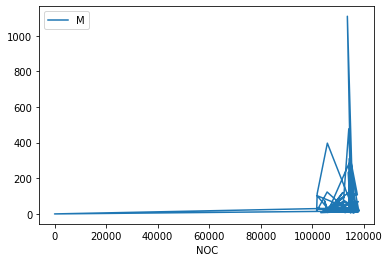

In [586]:
df_Brute.plot(x ='NOC', y='M', kind = 'line')

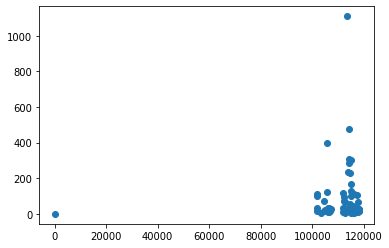

In [585]:
plt.scatter(df_Brute['NOC'], df_Brute['M'])

## KMP

In [589]:
df_KMP= pd.DataFrame(data_KMP, columns = ['M', 'NOC']) 
for i in range(0,len(df_KMP)):
    if df_KMP['M'][i]==29903:
        df_KMP['M'][i]=0
        df_KMP['NOC'][i]=0

In [600]:
print(df_KMP)
highest=max(df_KMP['NOC'])
print("Upper Bound = ",highest)

      M    NOC
0    14  78423
1    15  71502
2    17  71358
3    14  77158
4    44  78712
..  ...    ...
95   16  78958
96   10  70783
97   20  77455
98   21  77691
99  230  76369

[100 rows x 2 columns]
Upper Bound =  78990


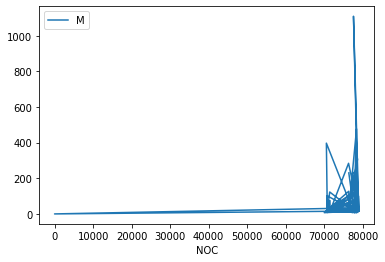

In [591]:
df_KMP.plot(x ='NOC', y='M', kind = 'line')

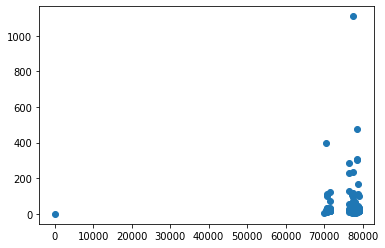

In [592]:
plt.scatter(df_KMP['NOC'], df_KMP['M'])

## Boyer Moore

In [593]:
df_Boyer= pd.DataFrame(data_Boyer, columns = ['M', 'NOC']) 
for i in range(0,len(df_KMP)):
    if df_Boyer['M'][i]==29903:
        df_Boyer['M'][i]=0
        df_Boyer['NOC'][i]=0

In [601]:
print(df_Boyer)
highest=max(df_Boyer['NOC'])
print("Upper Bound = ",highest)

      M    NOC
0    14  31895
1    15  24452
2    17  14067
3    14  22452
4    44  31740
..  ...    ...
95   16  27234
96   10  25371
97   20  31978
98   21  67943
99  230  51619

[100 rows x 2 columns]
Upper Bound =  71860


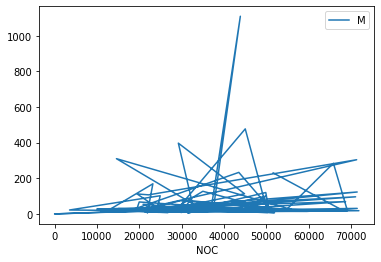

In [595]:
df_Boyer.plot(x ='NOC', y='M', kind = 'line')

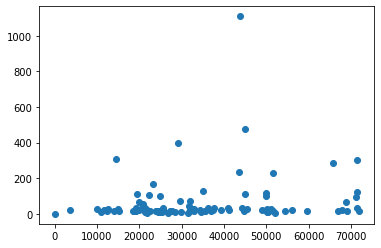

In [596]:
plt.scatter(df_Boyer['NOC'], df_Boyer['M'])